<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_5_keras_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Adapted from: https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_5_keras_transformers.ipynb

In [43]:
import pandas as pd
import numpy as np
import os

names = ['year', 'u' , 'x', 'obs_num']

path = r"C:\Users\sian_\OneDrive\Documents\Thesis\MILP_Formulation\Optimal_Control_Toy"
df = pd.read_csv("data_1.csv",sep=',', header=0, names=names,index_col=False)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.bfill(inplace=True)
df.ffill(inplace=True) #for obs num


print("Starting file:")
print(df[0:10])

print("Ending file:")
print(df[-10:])

print(df.shape)

Starting file:
       year         u         x  obs_num
0  0.000000  0.250000  1.000000      1.0
1  0.000003  0.250000  1.000004      1.0
2  0.000007  0.250001  1.000007      1.0
3  0.000010  0.250001  1.000011      1.0
4  0.000013  0.250002  1.000014      1.0
5  0.000017  0.250002  1.000018      1.0
6  0.000020  0.250003  1.000021      1.0
7  0.000023  0.250003  1.000025      1.0
8  0.000027  0.250003  1.000028      1.0
9  0.000030  0.250004  1.000032      1.0
Ending file:
            year         u         x  obs_num
899990  0.999970  1.999940  3.333183      3.0
899991  0.999973  1.999947  3.333200      3.0
899992  0.999977  1.999953  3.333217      3.0
899993  0.999980  1.999960  3.333233      3.0
899994  0.999983  1.999967  3.333250      3.0
899995  0.999987  1.999973  3.333267      3.0
899996  0.999990  1.999980  3.333283      3.0
899997  0.999993  1.999987  3.333300      3.0
899998  0.999997  1.999993  3.333317      3.0
899999  1.000000  2.000000  3.333333      3.0
(900000, 4)


In [44]:
# # Find the last zero and move one beyond
# start_id = max(df[df['obs_num'] == 0].index.tolist())+1
# print(start_id)
# df = df[start_id:] # Trim the rows that have missing observations

Divide into training and test/validation sets.

In [45]:
df['u'] = df['u'].astype(float)
df12 = df[df['obs_num']<3.0]
df123 = df[df['obs_num']<4.0]

df_train = df123[df123['year']<0.7]
df_test = df123[df123['year']>=0.7]

spots_train_u = df_train['u'].tolist()
spots_train_x = df_train['x'].tolist()
spots_test_u = df_test['u'].tolist()
spots_test_x = df_test['x'].tolist()

print("Training set has {} observations.".format(len(spots_train_u)))
print("Test set has {} observations.".format(len(spots_test_u)))
# print(spots_train)

Training set has 630000 observations.
Test set has 270000 observations.


In [46]:

df1 = df[df['obs_num']==1.0]
df2 = df[df['obs_num']==2.0]
df3 = df[df['obs_num']==3.0]

df_test1 = df1[df1['year']>=0.7]
df_test2 = df2[df2['year']>=0.7]
df_test3 = df3[df3['year']>=0.7]

spots_test1_u = df_test1['u'].tolist()
spots_test1_x = df_test1['x'].tolist()
spots_test2_x = df_test2['x'].tolist()
spots_test2_u = df_test2['u'].tolist()
spots_test3_x = df_test3['x'].tolist()
spots_test3_u = df_test3['u'].tolist()

print("Test set 1 has {} observations.".format(len(spots_test1_u)))
print("Test set 2 has {} observations.".format(len(spots_test2_u)))
print("Test set 3 has {} observations.".format(len(spots_test3_u)))

Test set 1 has 90000 observations.
Test set 2 has 90000 observations.
Test set 3 has 90000 observations.


The **to_sequences** function takes linear time series data into an **x** and **y** where **x** is all possible sequences of seq_size. After each **x** sequence, this function places the next value into the **y** variable. These **x** and **y** data can train a time-series neural network.

In [47]:
import numpy as np

def to_sequences(seq_size, obs_x, obs_u):

    x = []
    y = []
    for i in range((len(obs_x))-SEQUENCE_SIZE):
        window1 = obs_x[i:(i+SEQUENCE_SIZE)] #use values of x to predict [x(t+1), u(t+1)]
        window2 = obs_u[i:(i+SEQUENCE_SIZE)] #use values of x to predict [x(t+1), u(t+1)]
        after_window = [obs_x[i+SEQUENCE_SIZE],obs_u[i+SEQUENCE_SIZE]]
        window = [[x, u] for x,u in zip(window1, window2)]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)

SEQUENCE_SIZE = 1
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train_x, spots_train_u )
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test_x, spots_test_u)

print("Shape of x train set: {}".format(x_train.shape))
print("Shape of x test set: {}".format(x_test.shape))

print("Shape of y train set: {}".format(y_train.shape))
print("Shape of y test set: {}".format(y_test.shape))

Shape of x train set: (629999, 1, 2)
Shape of x test set: (269999, 1, 2)
Shape of y train set: (629999, 2)
Shape of y test set: (269999, 2)


In [48]:

x_test1, y_test1 = to_sequences(SEQUENCE_SIZE,spots_test1_x, spots_test1_u)
print("Shape of y1 test set: {}".format(y_test1.shape))

x_test2, y_test2 = to_sequences(SEQUENCE_SIZE,spots_test2_x, spots_test2_u)
print("Shape of y2 test set: {}".format(y_test2.shape))

x_test3, y_test3 = to_sequences(SEQUENCE_SIZE,spots_test3_x, spots_test3_u)
print("Shape of y3 test set: {}".format(y_test3.shape))

Shape of y1 test set: (89999, 2)
Shape of y2 test set: (89999, 2)
Shape of y3 test set: (89999, 2)


We can view the results of the **to_sequences** encoding of the sunspot data.

In [49]:

# print('func 1',x_train[0])
# print('func 2',x_train[1])

In [12]:
#!pip install tensorflow

import tensorflow as tf
print(tf.__version__)


ModuleNotFoundError: No module named 'tensorflow'

Next, we create the transformer_encoder; I obtained this function from a [Keras example](https://keras.io/examples/timeseries/timeseries_transformer_classification/). This layer includes residual connections, layer normalization, and dropout. This resulting layer can be stacked multiple times. We implement the projection layers with the Keras Conv1D.

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    ## NB dropout layer is only applied during training not inference (https://keras.io/api/layers/regularization_layers/dropout/)
    
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    # x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    # x = layers.Dropout(dropout)(x)
    # x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(inputs.shape[-1], activation="relu")(x)
    
    #x = layers.Conv2D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    #x = layers.Dropout(dropout)(x)
    #x = layers.Conv2D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res

ModuleNotFoundError: No module named 'tensorflow'

The following function is provided to build the model, including the attention layer.

In [52]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0.25,
    mlp_dropout=0.25,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    print(x.shape, x)
    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    #x = layers.GlobalAveragePooling2D(data_format="channels_first")(x)
    print(x.shape, x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="relu")(x)
    return keras.Model(inputs, outputs)

In [53]:
# model parameters:
model_params = {
    'input_shape': x_train.shape[1:],
    'head_size': 4,
    'num_heads': 12,
    'ff_dim': 10, #32
    'num_transformer_blocks': 1,
    'mlp_units': [128], #24
    'mlp_dropout': 0.1,
    'dropout': 0.1,
    'validation_split': 0.2,
    'epochs': 400,
    'batch_size': 64,
    'learning_rate': 1e-3
}
"""
model_params = {
    'input_shape': x_train.shape[1:],
    'head_size': 10,
    'num_heads': 4,
    'ff_dim': 4,
    'num_transformer_blocks': 1,
    'mlp_units': [128],
    'mlp_dropout': 0,
    'dropout': 0,
    'validation_split': 0.2,
    'epochs': 200,
    'batch_size': 64,
    'learning_rate': 1e-3
}
"""

"\nmodel_params = {\n    'input_shape': x_train.shape[1:],\n    'head_size': 10,\n    'num_heads': 4,\n    'ff_dim': 4,\n    'num_transformer_blocks': 1,\n    'mlp_units': [128],\n    'mlp_dropout': 0,\n    'dropout': 0,\n    'validation_split': 0.2,\n    'epochs': 200,\n    'batch_size': 64,\n    'learning_rate': 1e-3\n}\n"

We are now ready to build and train the model.

In [54]:


model = build_model(
    input_shape = model_params["input_shape"],
    head_size = model_params["head_size"],
    num_heads = model_params["num_heads"],
    ff_dim = model_params["ff_dim"],
    num_transformer_blocks = model_params['num_transformer_blocks'],
    mlp_units = model_params["mlp_units"],
    mlp_dropout = model_params["mlp_dropout"],
    dropout = model_params["dropout"],
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=model_params['learning_rate'])
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=2, \
    restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split = model_params["validation_split"],
    epochs = model_params["epochs"],
    batch_size = model_params["batch_size"],
    callbacks=callbacks,
    shuffle=True,
)

model.evaluate(x_test, y_test, verbose=1)

(None, 1, 2) KerasTensor(type_spec=TensorSpec(shape=(None, 1, 2), dtype=tf.float32, name=None), name='tf.__operators__.add_5/AddV2:0', description="created by layer 'tf.__operators__.add_5'")
(None, 2) KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='global_average_pooling1d_2/Mean:0', description="created by layer 'global_average_pooling1d_2'")
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1, 2)]               0         []                            
                                                                                                  
 layer_normalization_4 (Lay  (None, 1, 2)                 4         ['input_3[0][0]']             
 erNormalization)                                                                                 
    

KeyboardInterrupt: 

Finally, we evaluate the model with RMSE.

In [ ]:
name = 'transformer_small_seqlen_1.keras'
model.save(name , overwrite=True)

In [ ]:
from sklearn import metrics

#score_x = np.sqrt(metrics.mean_squared_error(pred[:,0],y_test[:,0]))
#print("X Score (RMSE): {}".format(score_x))

#score_u = np.sqrt(metrics.mean_squared_error(pred[:,1],y_test[:,1]))
#print("U Score (RMSE): {}".format(score_u))

In [ ]:
preds_x = []
rmse_x = []
preds_u = []
rmse_u = []

for x,y in [[x_test1, y_test1],[x_test2, y_test2],[x_test3, y_test3]]:
    pred = model.predict(x)

    score_x = np.sqrt(metrics.mean_squared_error(pred[:,0],y[:,0]))
    print("X Score (RMSE): {}".format(score_x))
    preds_x.append(pred[:,0])
    rmse_x.append(score_x)

    score_u = np.sqrt(metrics.mean_squared_error(pred[:,1],y[:,1]))
    print("U Score (RMSE): {}".format(score_u))
    preds_u.append(pred[:,1])
    rmse_u.append(score_u)

print('Prediction shape: ', len(preds_x))

2813/2813 [==============================] - 3s 1ms/step
X Score (RMSE): 0.009093437465484654
U Score (RMSE): 0.003671974160076302
2813/2813 [==============================] - 3s 1ms/step
X Score (RMSE): 0.006560536436007818
U Score (RMSE): 0.01016182758051596
2813/2813 [==============================] - 3s 1ms/step
X Score (RMSE): 0.029987403859263385
U Score (RMSE): 0.008193451770716852
Prediction shape:  3


In [ ]:
import csv
# New filename for clarity
new_filename = "results_small_relu_2.csv"

# Create and write to the new CSV file with model parameters and results
with open(new_filename, 'a', newline='') as file:
    writer = csv.writer(file)
    # Writing headers for model parameters
    headers = list(model_params.keys())
    headers.append('rmse_x_1')
    headers.append('rmse_x_2')
    headers.append('rmse_x_3')
    headers.append('rmse_u_1')
    headers.append('rmse_u_2')
    headers.append('rmse_u_3')
    headers.append(name)
    writer.writerow(headers)
    
    # Writing values
    values = list(model_params.values())
    values.append(rmse_x[0])  # Adding first RMSE
    values.append(rmse_x[1])  # Adding second RMSE
    values.append(rmse_x[2])  
    values.append(rmse_u[0])  # Adding first RMSE
    values.append(rmse_u[1])  # Adding second RMSE
    values.append(rmse_u[2])
    values.append('')
    writer.writerow(values)

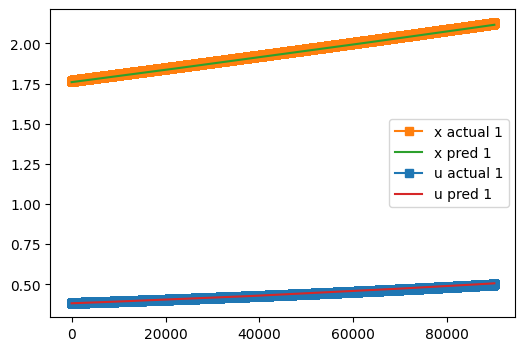

In [ ]:
import matplotlib.pyplot as plt
func = 0
plt.figure(figsize=(6, 4))
plt.plot(y_test1[:,0], 's-',color='C1', label=f'x actual {func+1}')
plt.plot(preds_x[func], '-',color='C2', label=f'x pred {func+1}')
plt.plot(y_test1[:,1], 's-',color='C0', label=f'u actual {func+1}')
plt.plot(preds_u[func], '-',color='C3', label=f'u pred {func+1}')
plt.legend()

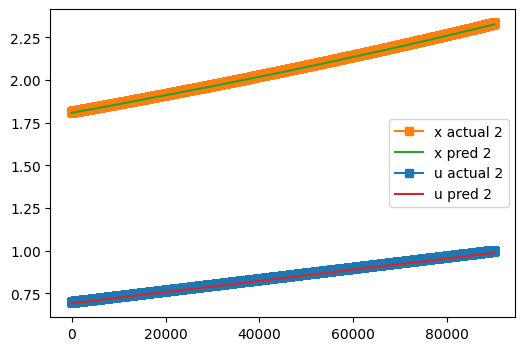

In [ ]:
import matplotlib.pyplot as plt
func = 1
plt.figure(figsize=(6, 4))
plt.plot(y_test2[:,0], 's-',color='C1', label=f'x actual {func+1}')
plt.plot(preds_x[func], '-',color='C2', label=f'x pred {func+1}')
plt.plot(y_test2[:,1], 's-',color='C0', label=f'u actual {func+1}')
plt.plot(preds_u[func], '-',color='C3', label=f'u pred {func+1}')
plt.legend()

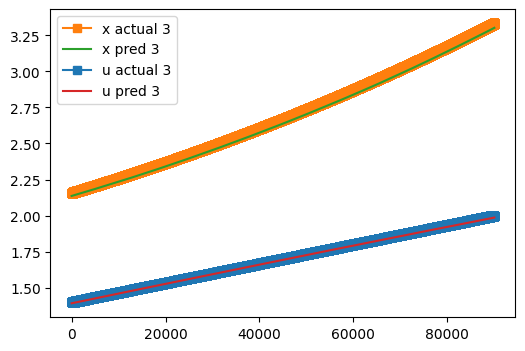

In [ ]:
import matplotlib.pyplot as plt
func = 2
plt.figure(figsize=(6, 4))
plt.plot(y_test3[:,0], 's-',color='C1', label=f'x actual {func+1}')
plt.plot(preds_x[func], '-',color='C2', label=f'x pred {func+1}')
plt.plot(y_test3[:,1], 's-',color='C0', label=f'u actual {func+1}')
plt.plot(preds_u[func], '-',color='C3', label=f'u pred {func+1}')
plt.legend()